<a href="https://colab.research.google.com/github/dedemasutti/Python-para-mercado-financeiro/blob/main/Projeto_de_Machine_Learning_com_dados_de_a%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install yfinance

[*********************100%%**********************]  1 of 1 completed


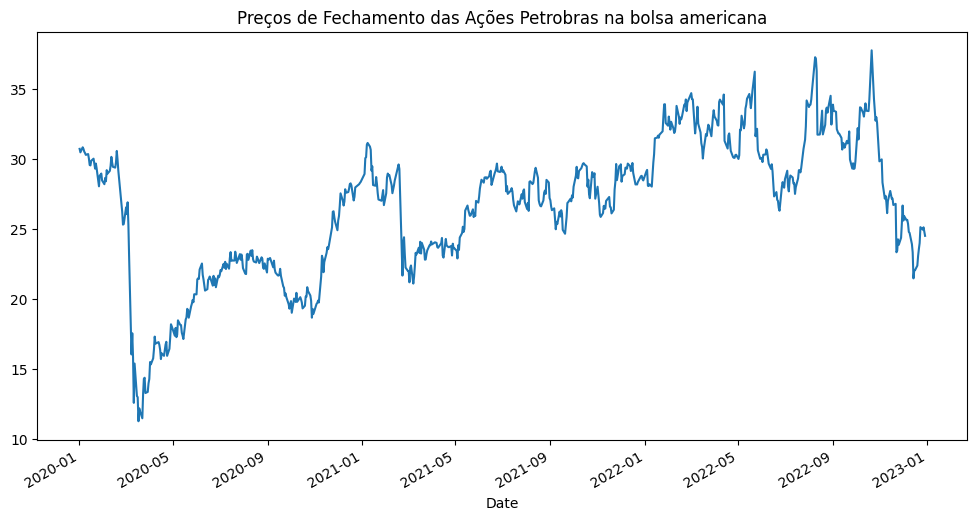

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

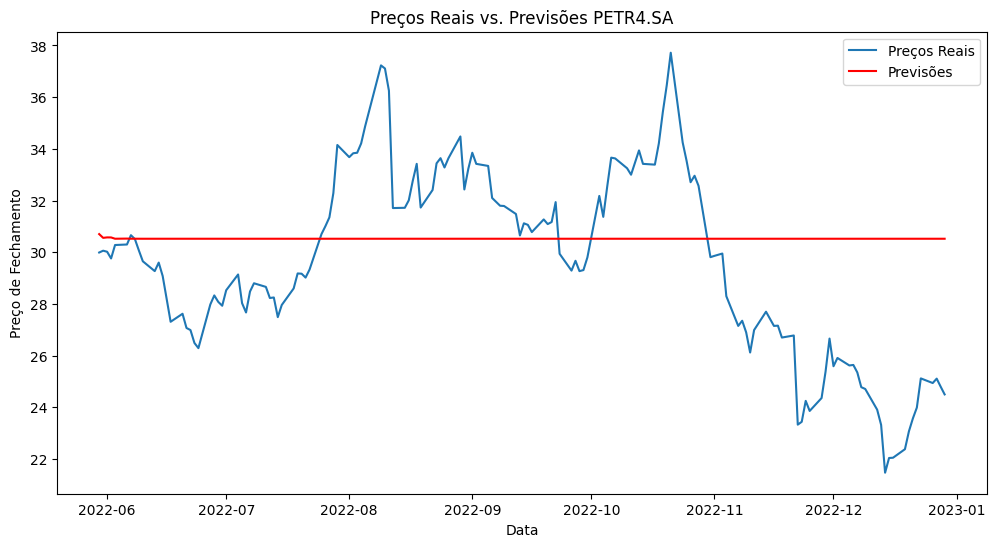

In [30]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Definir o ticker da ação que você deseja analisar
ticker = 'PETR4.SA'  # Exemplo: Apple Inc.

# Coletar dados históricos de preços usando o Yahoo Finance
data = yf.download(ticker, start='2020-01-01', end='2023-01-01')

# Selecionar a coluna de preços de fechamento para análise
data = data['Close']

# Visualizar os dados
data.plot(figsize=(12, 6))
plt.title('Preços de Fechamento das Ações Petrobras na bolsa americana')
plt.show()

# Dividir os dados em treinamento e teste
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Ajustar o modelo ARIMA
order = (5, 1, 0)  # Parâmetros p, d, q do modelo ARIMA
model = ARIMA(train_data, order=order)
model_fit = model.fit()

# Realizar previsões
start_idx = len(train_data)
end_idx = len(train_data) + len(test_data) - 1
predictions = model_fit.predict(start=start_idx, end=end_idx, dynamic=False)

# Visualizar previsões em relação aos preços reais
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data.values, label='Preços Reais')
plt.plot(test_data.index, predictions, color='red', label='Previsões')
plt.title('Preços Reais vs. Previsões PETR4.SA')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed


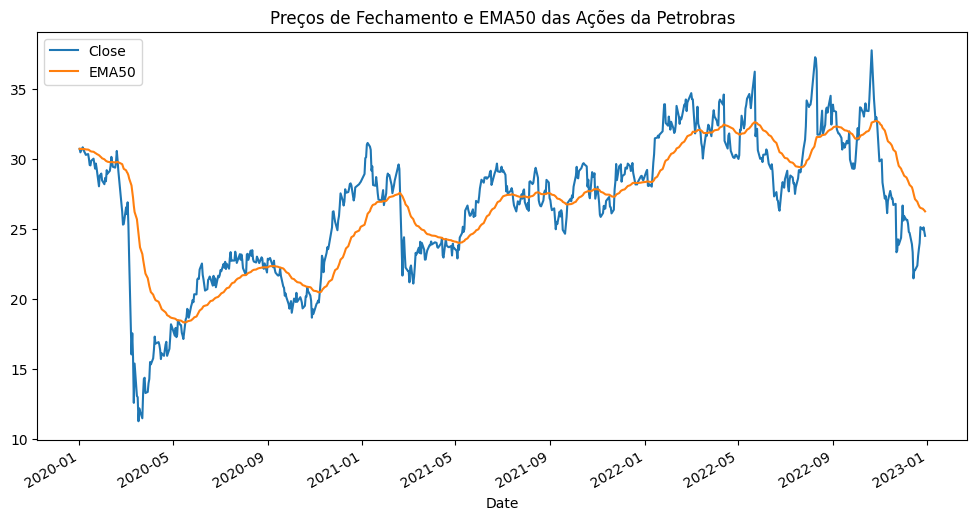

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

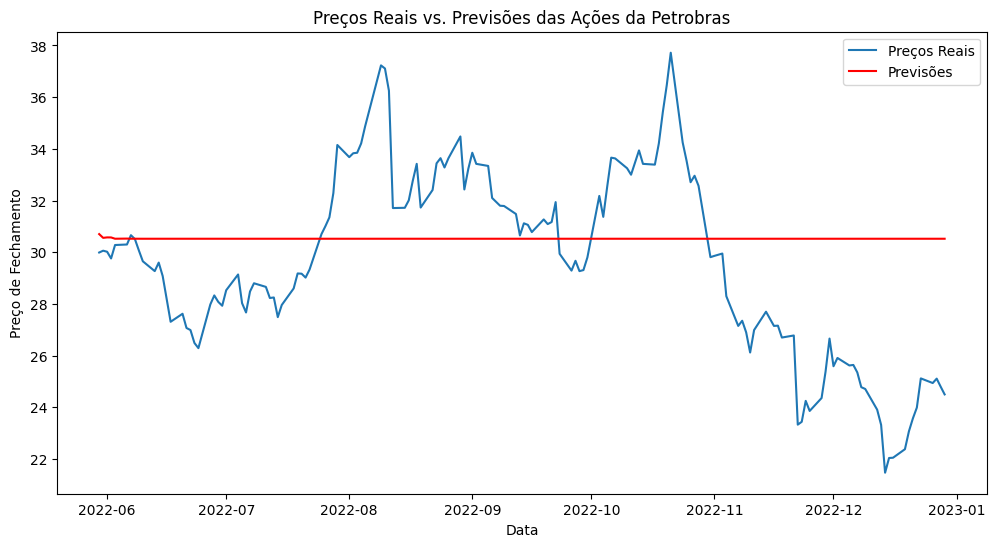

In [32]:

# Coletar dados históricos de preços usando o Yahoo Finance
data = yf.download(ticker, start='2020-01-01', end='2023-01-01')

# Calcular a Média Móvel Exponencial (EMA) de 50 dias como indicador técnico
data['EMA50'] = data['Close'].ewm(span=50, adjust=False).mean()

# Selecionar a coluna de preços de fechamento e a coluna EMA50 para análise
data = data[['Close', 'EMA50']]

# Visualizar os dados
data.plot(figsize=(12, 6))
plt.title('Preços de Fechamento e EMA50 das Ações da Petrobras')
plt.show()

# Dividir os dados em treinamento e teste
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Ajustar o modelo ARIMA
order = (5, 1, 0)  # Parâmetros p, d, q do modelo ARIMA
model = ARIMA(train_data['Close'], order=order)
model_fit = model.fit()

# Realizar previsões
start_idx = len(train_data)
end_idx = len(train_data) + len(test_data) - 1
predictions = model_fit.predict(start=start_idx, end=end_idx, dynamic=False)

# Visualizar previsões em relação aos preços reais
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Close'].values, label='Preços Reais')
plt.plot(test_data.index, predictions, color='red', label='Previsões')
plt.title('Preços Reais vs. Previsões das Ações da Petrobras')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.show()

In [34]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

[*********************100%%**********************]  1 of 1 completed
Epoch 1/50
81/81 [==============================] - 2s 8ms/step - loss: 0.0468
Epoch 2/50
81/81 [==============================] - 1s 10ms/step - loss: 8.6541e-04
Epoch 3/50
81/81 [==============================] - 1s 10ms/step - loss: 7.1454e-04
Epoch 4/50
81/81 [==============================] - 1s 10ms/step - loss: 6.8588e-04
Epoch 5/50
81/81 [==============================] - 1s 8ms/step - loss: 6.7211e-04
Epoch 6/50
81/81 [==============================] - 1s 7ms/step - loss: 6.2474e-04
Epoch 7/50
81/81 [==============================] - 1s 7ms/step - loss: 5.7930e-04
Epoch 8/50
81/81 [==============================] - 1s 7ms/step - loss: 5.7380e-04
Epoch 9/50
81/81 [==============================] - 1s 7ms/step - loss: 5.2294e-04
Epoch 10/50
81/81 [==============================] - 1s 7ms/step - loss: 5.2121e-04
Epoch 11/50
81/81 [==============================] - 1s 6ms/step - loss: 4.8653e-04
Epoch 12/50
81/81

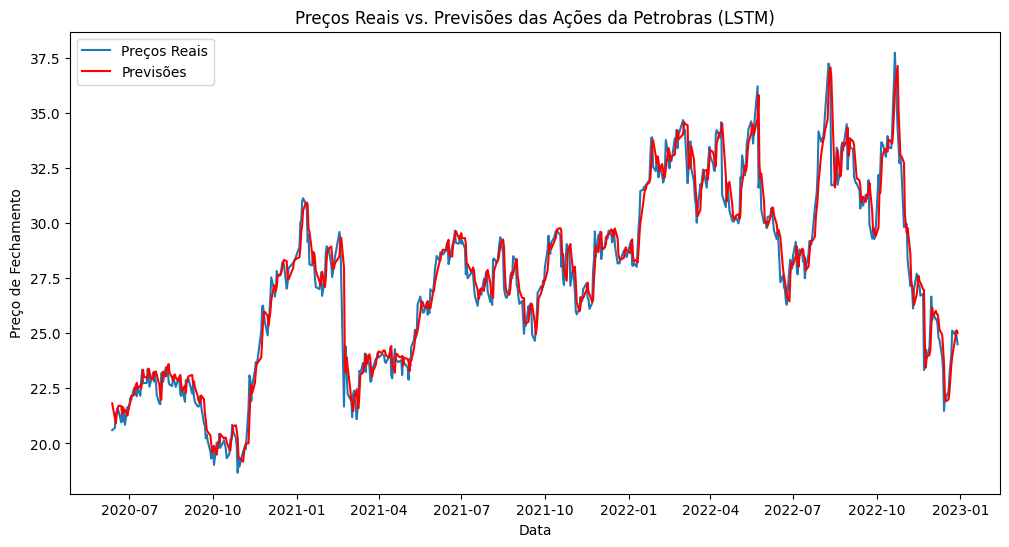

In [35]:
# Definir o ticker da ação que você deseja analisar
ticker = 'PETR4.SA'

# Coletar dados históricos de preços usando o Yahoo Finance
data = yf.download(ticker, start='2010-01-01', end='2023-01-01')

# Selecionar a coluna de preços de fechamento para análise
data = data['Close']

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data.values.reshape(-1, 1))

# Dividir os dados em treinamento e teste
train_size = int(len(data_scaled) * 0.8)
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

# Criar sequências de dados para treinamento
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 10  # Tamanho da sequência de entrada
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Construir o modelo LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Treinar o modelo
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Fazer previsões
y_pred = model.predict(X_test)

# Desnormalizar as previsões
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Calcular o erro médio quadrado
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualizar previsões em relação aos preços reais
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_test, label='Preços Reais')
plt.plot(data.index[-len(y_test):], y_pred, color='red', label='Previsões')
plt.title('Preços Reais vs. Previsões das Ações da Petrobras (LSTM)')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.show()